In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun, G
import astropy.units as u
import tqdm
from matplotlib import colors 
import pickle
import os

sys.path.append('../my_funcs/')
from pipeline_main import pipeline, serialize_directory
from pipeline_streamers import infall_sphere 


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

color_use = ['orangered', 'cornflowerblue', 'seagreen', 'tab:orange', 'blueviolet', 'olive', 'orangered', 'cornflowerblue', 'seagreen', 'tab:orange', 'blueviolet', 'olive']

# SLurm: 43223385

In [3]:
saved_as = ['122', 'old13']
plot_data = {key: serialize_directory(filename = 'AM_evolution_s' + key + '.pkl', store = False) for key in saved_as}

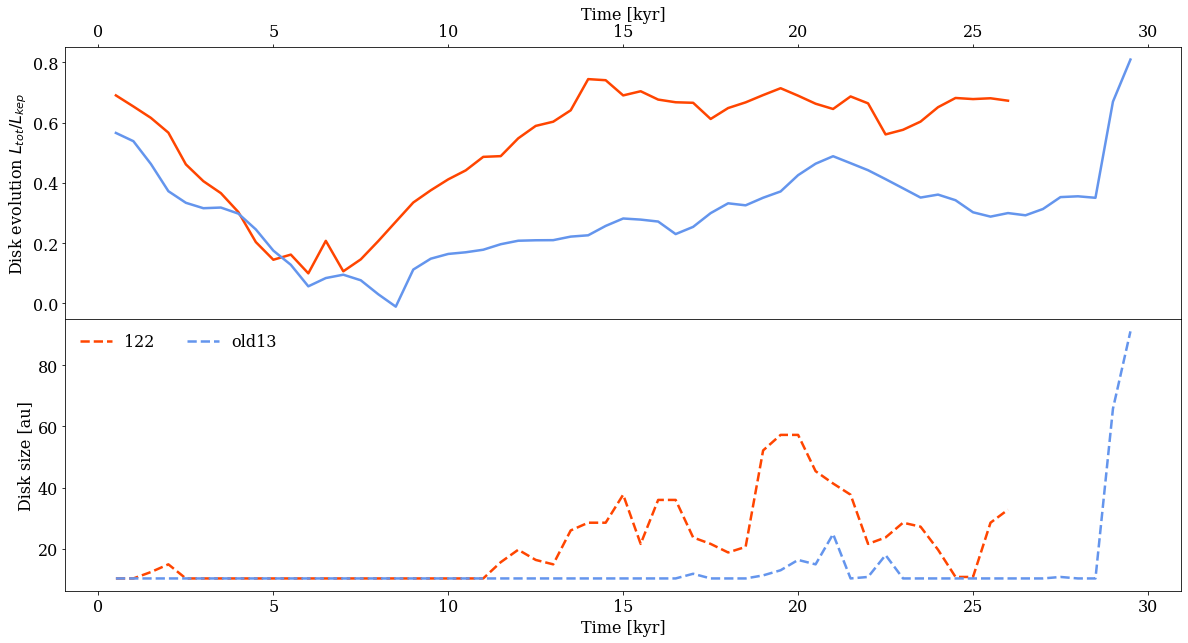

In [34]:
fig, axs = plt.subplots(2, 1, figsize = (20, 10))
ax = axs[0]
ax.xaxis.tick_top(); ax.xaxis.set_label_position('top')
ax.set_xlabel('Time [kyr]', fontsize=16); ax.set_ylabel('Disk evolution $L_{tot}/L_{kep}$', fontsize=16)

for i, sink in enumerate(plot_data.keys()):
    ax.plot(plot_data[sink]['time'] * 1e-3, plot_data[sink]['L_tot']/plot_data[sink]['L_kep'], label = sink, color = color_use[i], lw = 2.5)
ax = axs[1]


ax.set_xlabel('Time [kyr]', fontsize=16); ax.set_ylabel('Disk size [au]', fontsize=16)

for i, sink in enumerate(plot_data.keys()):
    ax.plot(plot_data[sink]['time'] * 1e-3, plot_data[sink]['disk_size'], label = sink, color = color_use[i], lw = 2.5, ls = '--')

    ax.legend(frameon = False, ncol = len(saved_as) + 1, loc = 'upper left')


fig.subplots_adjust(wspace=0, hspace=0)

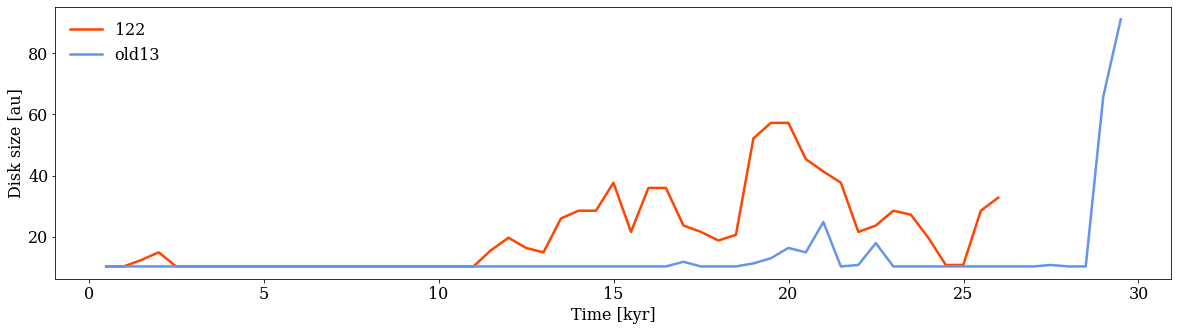

In [21]:
fig, axs = plt.subplots(figsize = (20, 5))

axs.set_xlabel('Time [kyr]', fontsize=16); axs.set_ylabel('Disk size [au]', fontsize=16)

for i, sink in enumerate(plot_data.keys()):
    axs.plot(plot_data[sink]['time'] * 1e-3, plot_data[sink]['disk_size'], label = sink, color = color_use[i], lw = 2.5)

plt.legend(frameon = False)